In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader.data as reader

In [35]:
data = reader.get_data_yahoo('CAKE')
df = data.reset_index()
# df['Date']
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-08-10,57.180000,55.430000,56.860001,55.580002,843900.0,49.782516
1,2015-08-11,56.439999,55.180000,55.540001,56.410000,736600.0,50.525940
2,2015-08-12,56.490002,55.340000,55.959999,56.430000,523800.0,50.543854
3,2015-08-13,57.410000,56.590000,56.680000,57.070000,618700.0,51.117088
4,2015-08-14,57.470001,56.750000,56.860001,57.099998,326200.0,51.143967
...,...,...,...,...,...,...,...
1254,2020-08-03,23.570000,22.750000,23.370001,23.250000,1980800.0,23.250000
1255,2020-08-04,24.500000,23.400000,23.410000,23.790001,1712400.0,23.790001
1256,2020-08-05,24.629999,23.870001,24.350000,24.150000,1346600.0,24.150000
1257,2020-08-06,25.309999,23.809999,24.150000,25.070000,1783900.0,25.070000


In [33]:
# df[["Date","Close"]]

In [36]:
# Select only the important features i.e. the date and price
df = df[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
df = df.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
df.head(5)

,ds,y
0,2015-08-10,55.580002
1,2015-08-11,56.410000
2,2015-08-12,56.430000
3,2015-08-13,57.070000
4,2015-08-14,57.099998


In [38]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(df) # fit the model using all data

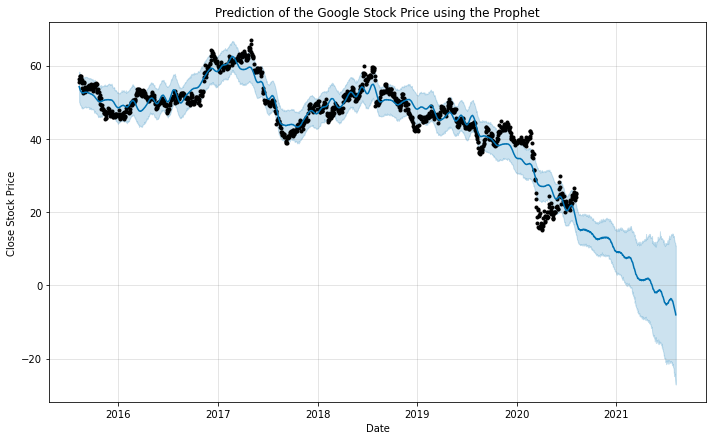

In [39]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

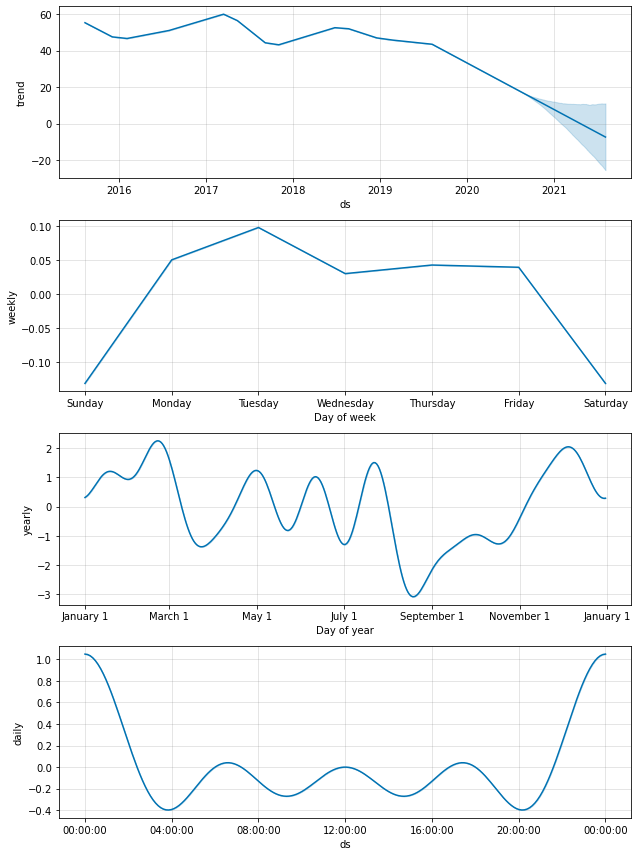

In [40]:
m.plot_components(prediction)
plt.show()